# Análisis: Gym Activity

- Data Sources: https://www.kaggle.com/datasets/mexwell/gym-check-ins-and-user-metadata/data

"_Gym Activity_" es un proyecto de análisis de datos donde se utilizan cuatro datasets diferentes, en los cuáles encontramos datos de usuarios, tipos de planes, ubicación de los gimnasios y el historia de entrada y salida de los usuarios a su respectivo gym.

Para el objetivo de este análisis se crean dos datasets a partir de los datos originales, ésto nos permitirá divir el análisis en las siguientes partes:
1. Demografía de usuarios
    - Distribución de las edades de los usuarios.
    - En que rango de edad se encuentran el mayor número de usuarios.
    - Proporción de usuarios por género.
2. Subscripciones favoritas por los usuarios
    - Cuál es la subscripción más vendida según la edad de los usuarios.
    - Cuál es la distribución de las subscripciones en base al genero de los usuarios.

**Librerías**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker  as ticker
import seaborn as sns
import sys

sys.path.append("..")

import modules.utils.paths as path

money_formatter = ticker.StrMethodFormatter("${x:,.0f}")
quantity_formatter = ticker.StrMethodFormatter("{x:,.0f}")

## Carga de datos

In [3]:
users_df = pd.read_csv(path.data_raw_dir("users_data.csv"))
plans_df = pd.read_csv(path.data_raw_dir("subscription_plans.csv"))
locations_df = pd.read_csv(path.data_raw_dir("gym_locations_data.csv"))
checkins_df = pd.read_csv(path.data_raw_dir("checkin_checkout_history_updated.csv"))

In [4]:
display(
  
  f"users_df: {users_df.shape}",
  users_df.head(3),
  f"plans_df: {plans_df.shape}",
  plans_df.head(3),
  f"locations_df: {locations_df.shape}",
  locations_df.head(3),
  f"checkins_df: {checkins_df.shape}",
  checkins_df.head(3),
)

'users_df: (5000, 9)'

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic


'plans_df: (3, 3)'

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


'locations_df: (10, 4)'

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"


'checkins_df: (300000, 6)'

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858


## Validación de datos

Tipo de datos de las variables de cada dataset 

In [5]:
# Tipos de datos de cada dataset
print("Tipo de datos en users:")
print(users_df.dtypes)
print("="*30)
print(users_df.dtypes.value_counts())

Tipo de datos en users:
user_id              object
first_name           object
last_name            object
age                   int64
gender               object
birthdate            object
sign_up_date         object
user_location        object
subscription_plan    object
dtype: object
object    8
int64     1
dtype: int64


In [6]:
print("Tipo de datos en subscription plans:")
print(plans_df.dtypes)
print("="*30)
print(plans_df.dtypes.value_counts())

Tipo de datos en subscription plans:
subscription_plan     object
price_per_month      float64
features              object
dtype: object
object     2
float64    1
dtype: int64


In [7]:
print("Tipo de datos en gym locations:")
print(locations_df.dtypes)
print("="*30)
print(locations_df.dtypes.value_counts())

Tipo de datos en gym locations:
gym_id        object
location      object
gym_type      object
facilities    object
dtype: object
object    4
dtype: int64


In [8]:
print("Tipo de datos en checkin-checkout history:")
print(checkins_df.dtypes)
print("="*30)
print(locations_df.dtypes.value_counts())

Tipo de datos en checkin-checkout history:
user_id            object
gym_id             object
checkin_time       object
checkout_time      object
workout_type       object
calories_burned     int64
dtype: object
object    4
dtype: int64


Valores faltantes y duplicados

In [9]:
print("Faltantes en users_df:", users_df.isna().sum().sum())
print("Faltantes en plans_df:", plans_df.isna().sum().sum())
print("Faltantes en locations_df:", locations_df.isna().sum().sum())
print("Faltantes en checkins_df:", checkins_df.isna().sum().sum())

Faltantes en users_df: 0
Faltantes en plans_df: 0
Faltantes en locations_df: 0
Faltantes en checkins_df: 0


In [10]:
print("Duplicados en users_df:", users_df.duplicated().sum())
print("Duplicados en plans_df:", plans_df.duplicated().sum())
print("Duplicados en locations_df:", locations_df.duplicated().sum())
print("Duplicados en checkins_df:", checkins_df.duplicated().sum())

Duplicados en users_df: 0
Duplicados en plans_df: 0
Duplicados en locations_df: 0
Duplicados en checkins_df: 0


## Limpieza y preprocesamiento

Conversión de valirables tipo `object` con valores de fechas a tipo `datetime`.

In [11]:
# users:
users_df["birthdate"]  = pd.to_datetime(users_df["birthdate"])
users_df["sign_up_date"]  = pd.to_datetime(users_df["sign_up_date"])

# checkin-checkout history:
checkins_df["checkin_time"] = pd.to_datetime(checkins_df["checkin_time"])
checkins_df["checkout_time"] = pd.to_datetime(checkins_df["checkout_time"])

Revisión de variables categóricas.

In [12]:
# users
print("Genders:",users_df["gender"].unique())
print("Locations:", users_df["user_location"].unique())
print("Plans:", users_df["subscription_plan"].unique())

Genders: ['Female' 'Non-binary' 'Male']
Locations: ['Denver' 'Orlando' 'Austin' 'Seattle' 'Atlanta' 'Detroit' 'Miami'
 'San Francisco' 'Boston' 'Las Vegas']
Plans: ['Basic' 'Pro' 'Student']


In [13]:
# locations
print("Locations:", locations_df["location"].unique())
print("Types:", locations_df["gym_type"].unique())
print("Facilities:", locations_df["facilities"].unique())

Locations: ['New York' 'Los Angeles' 'Chicago' 'Houston' 'Phoenix' 'Philadelphia'
 'San Antonio' 'San Diego' 'Dallas' 'San Jose']
Types: ['Premium' 'Budget' 'Standard']
Facilities: ['Climbing Wall, Swimming Pool, Basketball Court'
 'Climbing Wall, Yoga Classes, Sauna'
 'Sauna, Climbing Wall, Swimming Pool'
 'Climbing Wall, Basketball Court, Swimming Pool'
 'Basketball Court, CrossFit, Swimming Pool'
 'Swimming Pool, Climbing Wall, Sauna'
 'Sauna, Basketball Court, Swimming Pool'
 'Basketball Court, Sauna, CrossFit' 'Sauna, CrossFit, Yoga Classes'
 'Swimming Pool, Sauna, CrossFit']


In [14]:
# history
checkins_df["workout_type"].unique()

array(['Weightlifting', 'Yoga', 'Cardio', 'CrossFit', 'Swimming',
       'Pilates'], dtype=object)

Creación de nuevas variables

**users_df**:
- `year_subscription`: Año de subscripción del usuario.
- `month_subscription`: Mes de subscripción del usuario.
- `age_bracket`: Rango/grupo de edades.

**checkins_df**:
- `workout_time`: Tiempo total entrenado por día (registro).
- `hour`: Hora del día en que se registró el checkin.
- `day`: Día de la semana en que se registró el checkin.
- `month`: Mes en que se registró el checkin.

In [15]:
# Subscription information
users_df["year_subscription"] = users_df["sign_up_date"].dt.year
users_df["month_subscription"] = users_df["sign_up_date"].dt.to_period("M")

min_age = users_df["age"].min()
bins = [min_age, 24, 34, 44, 55, float("inf")]
labels = [f"{min_age}-24", "25-34", "35-44", "45-55", "+55"]
users_df["age_bracket"] = pd.cut(users_df["age"], bins=bins, labels=labels)

# history
checkins_df["workout_duration_min"] = ((checkins_df["checkout_time"] - checkins_df["checkin_time"] ).dt.total_seconds()/60).astype(int)
checkins_df["hour"] = checkins_df["checkin_time"].dt.hour
checkins_df["day"] = checkins_df["checkin_time"].dt.day_name()
checkins_df["month"] = checkins_df["checkin_time"].dt.month_name()

Combinamos los DataSets.

Relación entre los DataFrames: <br>

![GymActivity DB](./imgs/GymActivity_DB.jpg)

In [16]:
users_plans_df = pd.merge(users_df,plans_df,on=['subscription_plan'])
# Eliminamos columnas que no necesitamos para el análisis.
users_plans_df.drop(["first_name", "last_name", "birthdate", "features", "user_location"], axis=1, inplace=True)

users_checkins = pd.merge(checkins_df, users_plans_df,on=['user_id'])
gym_activity_df = pd.merge(users_checkins, locations_df,on=['gym_id'])

print("shape:", gym_activity_df.shape)
print("nulls:", gym_activity_df.isna().sum().sum())
gym_activity_df.dtypes

shape: (300000, 21)
nulls: 6358


user_id                         object
gym_id                          object
checkin_time            datetime64[ns]
checkout_time           datetime64[ns]
workout_type                    object
calories_burned                  int64
workout_duration_min             int64
hour                             int64
day                             object
month                           object
age                              int64
gender                          object
sign_up_date            datetime64[ns]
subscription_plan               object
year_subscription                int64
month_subscription           period[M]
age_bracket                   category
price_per_month                float64
location                        object
gym_type                        object
facilities                      object
dtype: object

## Análisis de usuarios y subscripciones

### 1. Demografía de usuarios

**Distribución de las edades de los usuarios**

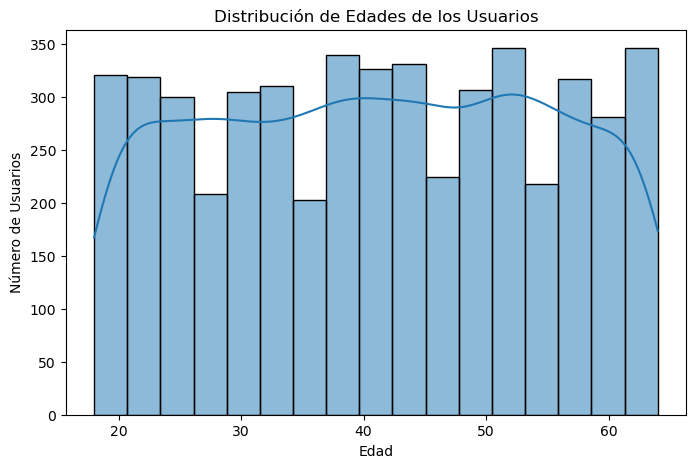

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(
  data=users_plans_df,
  x="age",
  kde=True,
  ax=ax
)

ax.set_title("Distribución de Edades de los Usuarios")
ax.set_xlabel("Edad")
ax.set_ylabel("Número de Usuarios")
plt.show()

**Rango de edad en el que se encuentran el mayor número de usuarios**

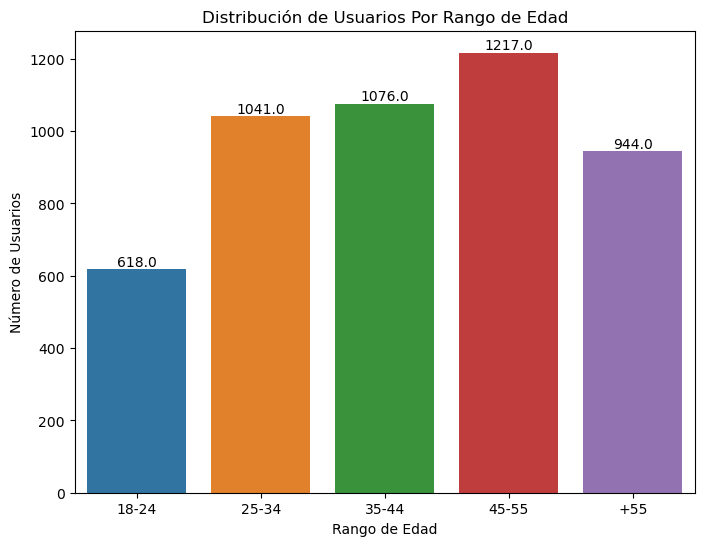

In [18]:
fix, ax = plt.subplots(figsize=(8,6))
sns.countplot(
  users_plans_df, 
  x="age_bracket"
)

for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,  p.get_height(), p.get_height(), ha='center', va='bottom', fontsize=10)

ax.set_title("Distribución de Usuarios Por Rango de Edad")
ax.set_ylabel("Número de Usuarios")
ax.set_xlabel("Rango de Edad");

**Observaciones:** La distribución de usuarios según la edad de éstos es uniforme; el segundo gráfico nos permite observar que la máyor cantidad de usuarios suscritos oscilan entre los 45 y 55 años, seguidos de usuarios entre 25 y 44.

**Proporción de usuarios por género**

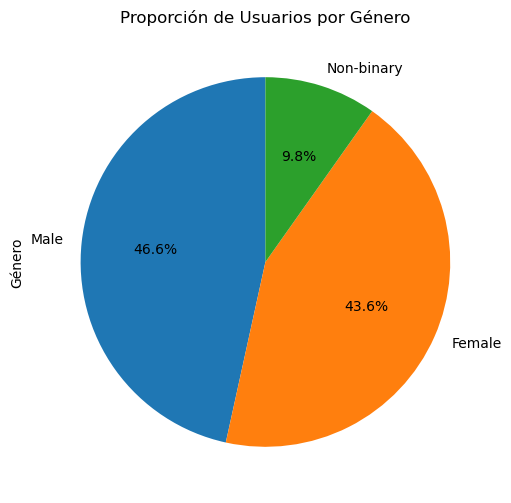

In [19]:
gender_counts = users_plans_df["gender"].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

gender_counts.plot(
  kind="pie",
  title="Proporción de Usuarios por Género",
  autopct="%1.1f%%",
  startangle=90,
  ylabel="Género",
  ax=ax
)

plt.show()

**Observaciones:** Esta cadena de gimnasios cuenta con una distribucion equitativa de usuarios entre hombres y mujeres, y a su vez empieza a darle auge a personas no bianarias, alcanzando así casí el 10% de sus usuarios.